In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.cluster as cluster
import time
from sklearn import cluster, datasets

## DBSCAN 

(1) Visualization with DBSCAN examples.

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

(2) Sklearn documentation.

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

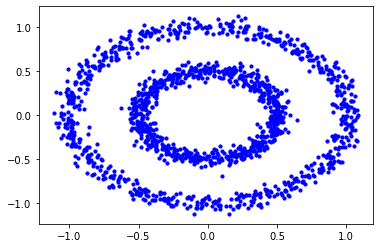

In [2]:
# Toy Example
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)[0]
data=noisy_circles
plt.scatter(data[:,0],data[:,1],s=10,c="b",cmap=plt.cm.cool)
plt.show()

In [3]:
def visuDB(data,eps,min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    plt.figure(figsize=(6,6))
    plt.scatter(data[:,0],data[:,1],c=db.labels_,s=10)
    print("Proportion of unclustered points=",(1*(db.labels_ < 0)).mean())
    plt.show()

Proportion of unclustered points= 0.0


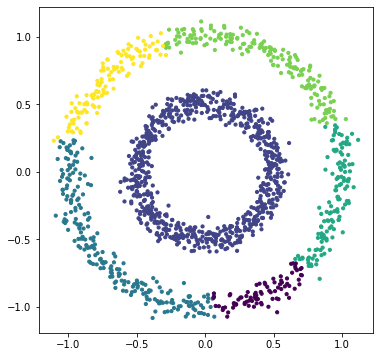

In [4]:
visuDB(data,0.21,50)

To detect individual anomalous points, look for combinations of eps and min_pts where the number of points NOT assigned to clusters is >0 but <5% of the data. 

Proportion of unclustered points= 0.011333333333333334


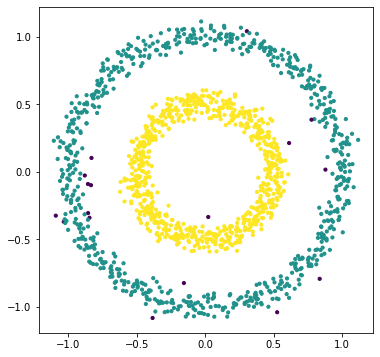

In [5]:
visuDB(data,0.08,10)

### Practice One: Try different eps and min_samples to compare the clustering results.

For min_samples = 50, can you find an eps which divides the data into the two rings without outliers?

For eps = .15, can you find min_points which produces <1% outliers (but more than zero)?

Proportion of unclustered points= 0.0


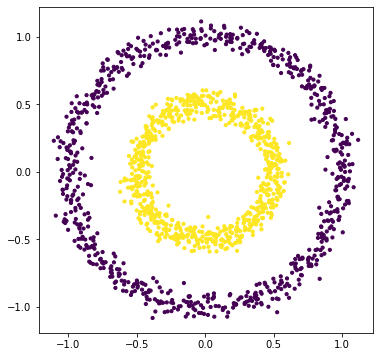

In [6]:
visuDB(data,0.23,50)

Proportion of unclustered points= 0.007333333333333333


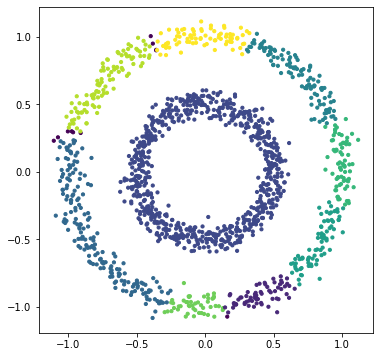

In [7]:
visuDB(data,0.15,34)

### Using DBSCAN for Anomalous Cluster Detection.

Our approach:

Scan through a wide range of parameter values. Choose values where # of points assigned to clusters is >0 but <10% of the data.  Note: the interpretation is different from above.  Now the points assigned to clusters are considered anomalous, and the remaining points are considered normal!

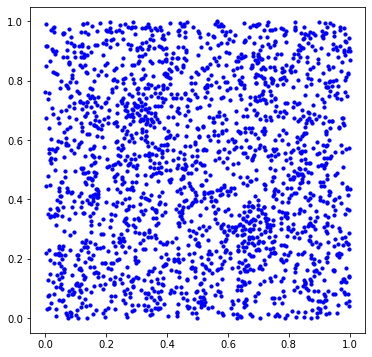

In [8]:
np.random.seed(1000)
centers = [[0.3, 0.7],[0.7, 0.3]]
X, labels_true = make_blobs(n_samples=100, centers=centers, cluster_std=0.04,
                            random_state=0)
no_structure = np.random.rand(2000, 2)
X2=np.append(X,no_structure,axis=0)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],s=10,c="b",cmap=plt.cm.cool)
thegraph = plt.scatter(no_structure[:,0],no_structure[:,1],c='b',s=10,cmap=plt.cm.cool)
plt.show()

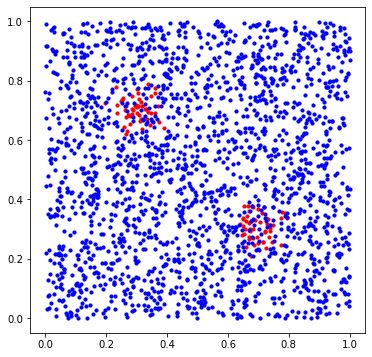

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],s=10,c="r",cmap=plt.cm.cool)
plt.scatter(no_structure[:,0],no_structure[:,1],c='b',s=10,cmap=plt.cm.cool)
plt.show()

eps = 0.018405268984517116 , min_samples = 10.0 , num_detected_points = 21
precision= 0.38095238095238093 recall= 0.08


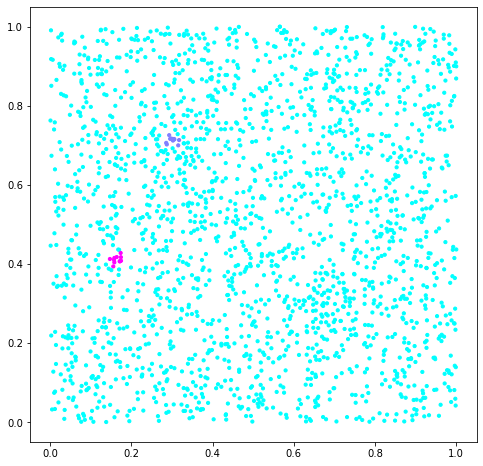

eps = 0.02944583007157463 , min_samples = 20.0 , num_detected_points = 20
precision= 0.75 recall= 0.15


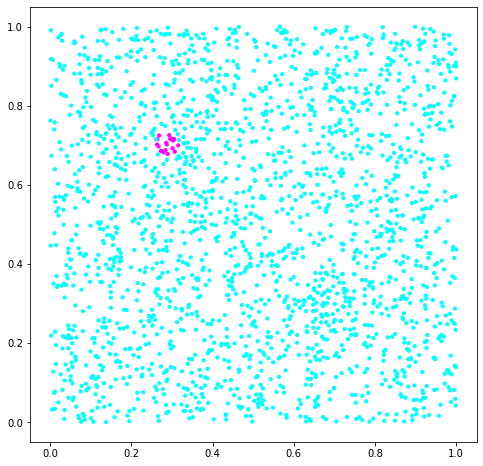

eps = 0.03724471178066576 , min_samples = 20.0 , num_detected_points = 168
precision= 0.4583333333333333 recall= 0.77


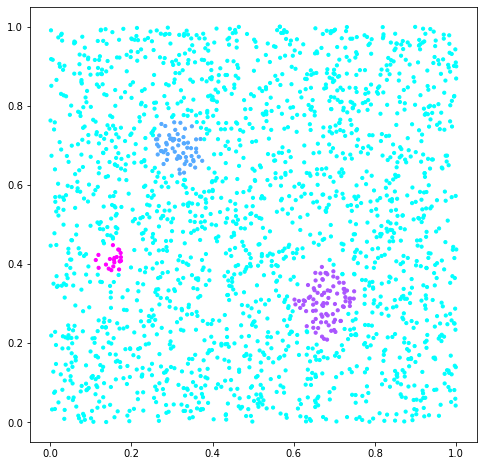

eps = 0.047109167996046974 , min_samples = 30.0 , num_detected_points = 160
precision= 0.525 recall= 0.84


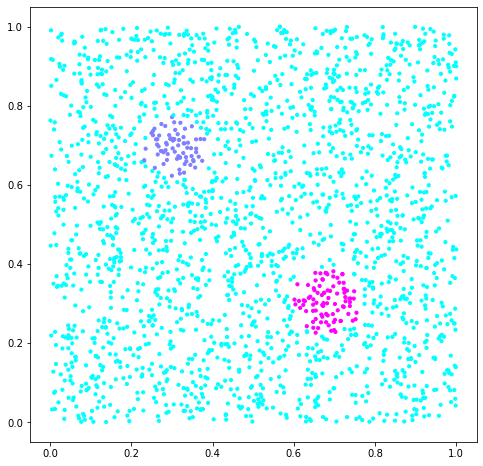

eps = 0.047109167996046974 , min_samples = 40.0 , num_detected_points = 40
precision= 0.675 recall= 0.27


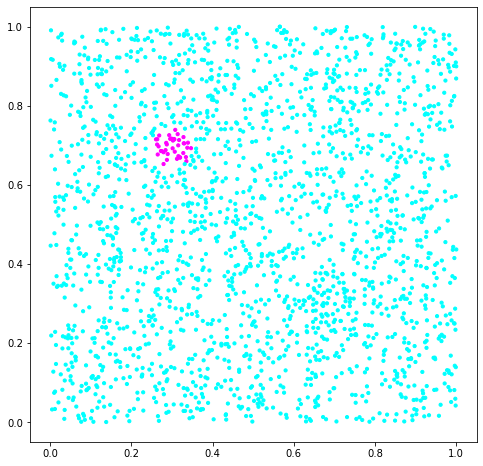

eps = 0.05958627690151256 , min_samples = 50.0 , num_detected_points = 157
precision= 0.535031847133758 recall= 0.84


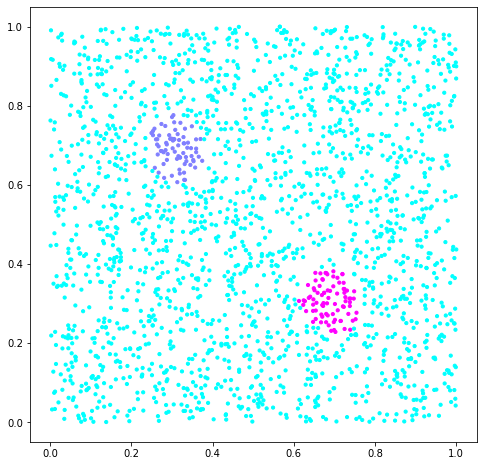

eps = 0.09532962466974597 , min_samples = 100.0 , num_detected_points = 168
precision= 0.2976190476190476 recall= 0.5


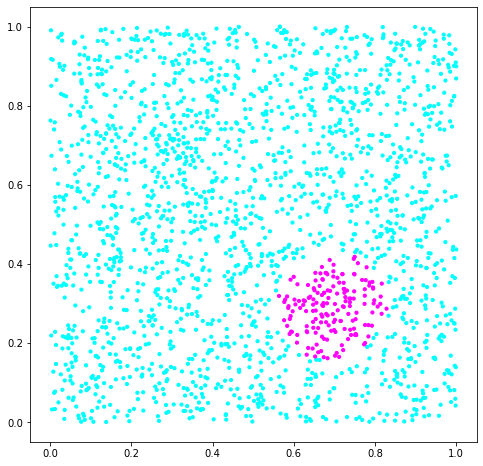

eps = 0.1205781730843855 , min_samples = 140.0 , num_detected_points = 202
precision= 0.24752475247524752 recall= 0.5


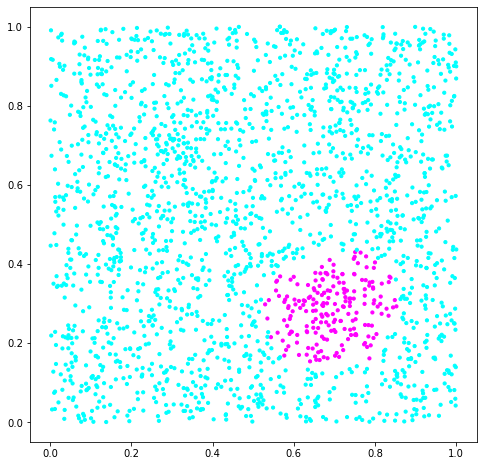

eps = 0.1205781730843855 , min_samples = 150.0 , num_detected_points = 152
precision= 0.3223684210526316 recall= 0.49


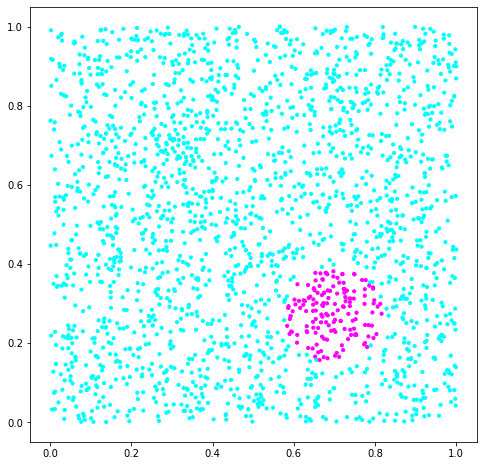

In [10]:
total_num_samples = len(X2[:,0])
max_eps = max(np.max(X2[:,0])-np.min(X2[:,0]),np.max(X2[:,1])-np.min(X2[:,1]))

for eps in np.logspace(np.log10(max_eps)-5,np.log10(max_eps),50):
    for min_samples in np.linspace(10,200,20,endpoint=True):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X2)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
            dbb=db
            plt.figure(figsize=(8,8))
            print("eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0]))
            
            # evaluation
            num_correct_clustered = len(db.labels_[0:100][db.labels_[0:100] >= 0])
            print("precision=",1.0*num_correct_clustered/num_clustered,"recall=",1.0*num_correct_clustered/100.0)
            
            plt.scatter(X2[:,0],X2[:,1],c=db.labels_,s=10,cmap=plt.cm.cool)
            plt.show()

## Practice #2. 

Detect which areas of Manhattan have the most serious rat problems (i.e., anomalous clusters of rodent complaints).

<img src="Manhattan neighborhood map.png" width=600 height=400>

         X       Y
0  1000980  228602
1  1000980  228602
2   997751  223053
3  1000980  228602
4  1000233  240165
eps = 63.98900000000004 , min_samples = 40 , num_detected_points = 393


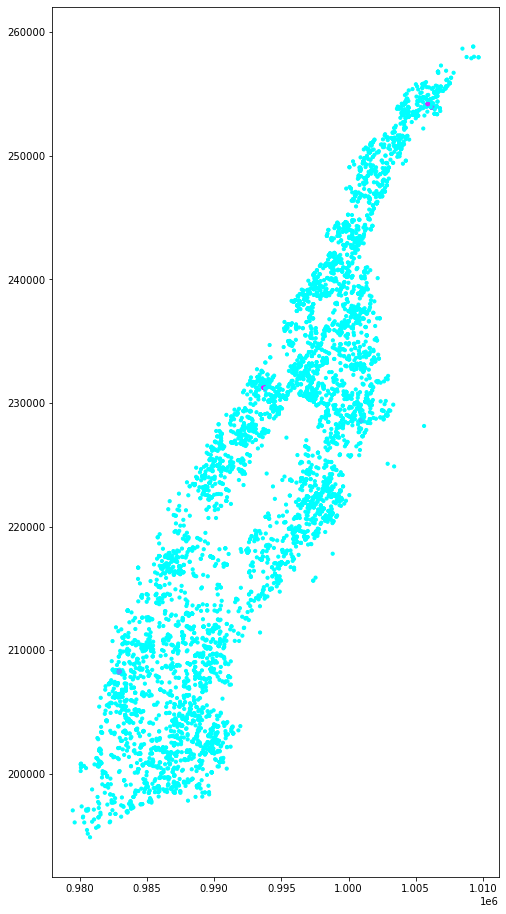

eps = 63.98900000000004 , min_samples = 80 , num_detected_points = 244


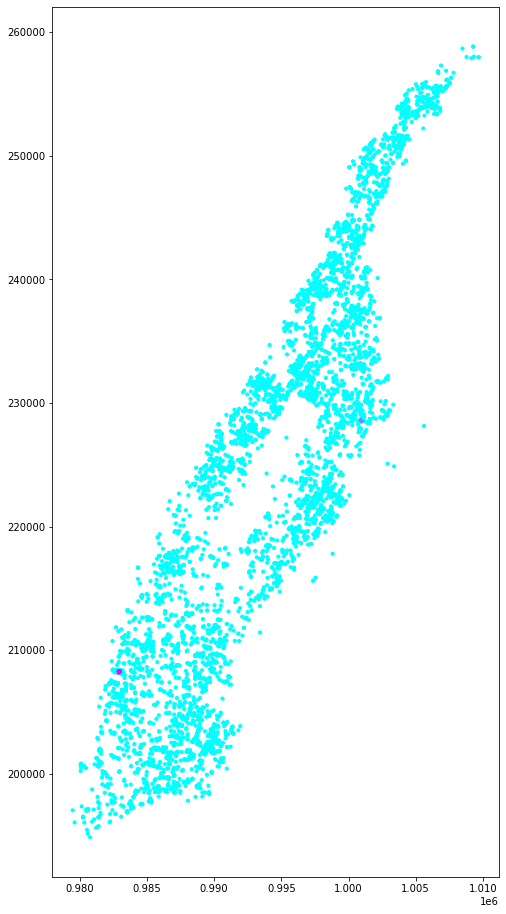

eps = 63.98900000000004 , min_samples = 120 , num_detected_points = 160


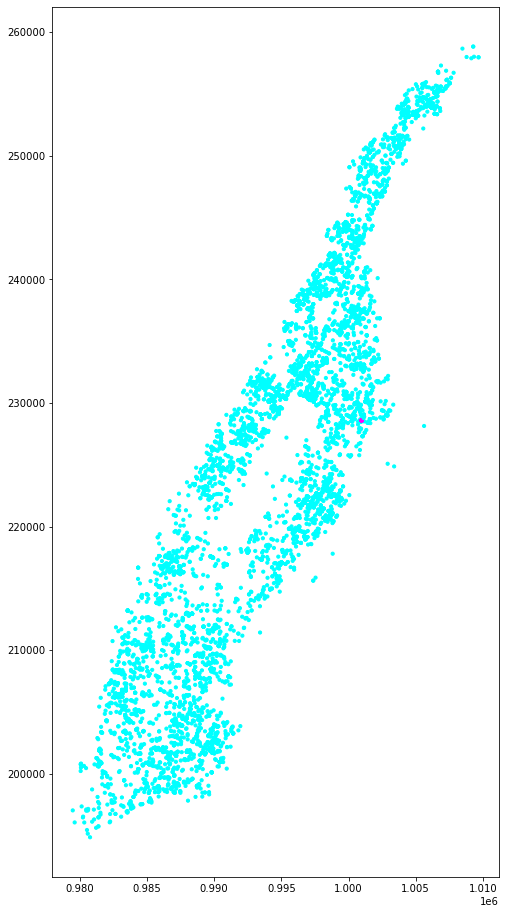

eps = 63.98900000000004 , min_samples = 160 , num_detected_points = 160


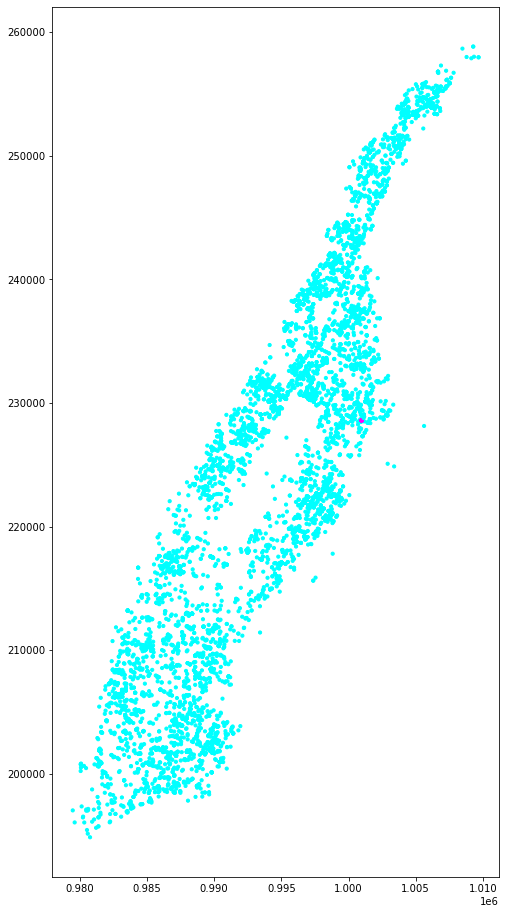

eps = 137.86012138045032 , min_samples = 40 , num_detected_points = 642


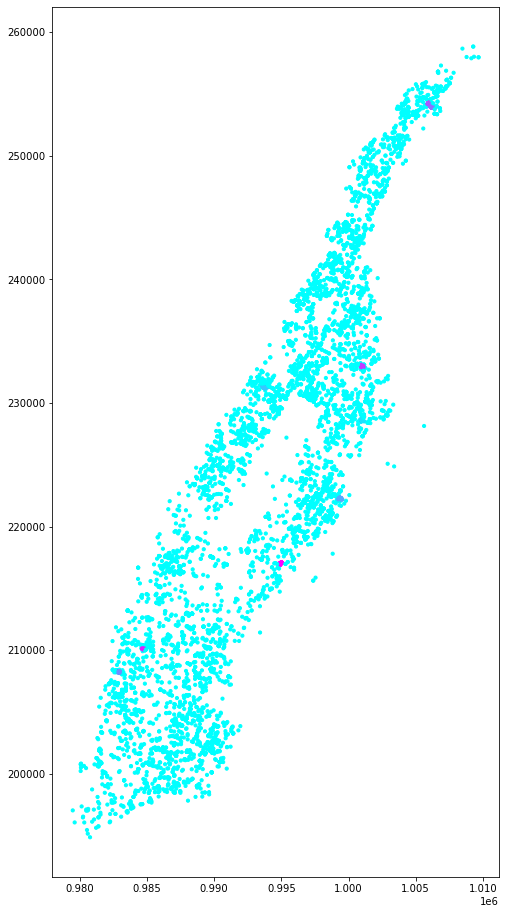

eps = 137.86012138045032 , min_samples = 80 , num_detected_points = 263


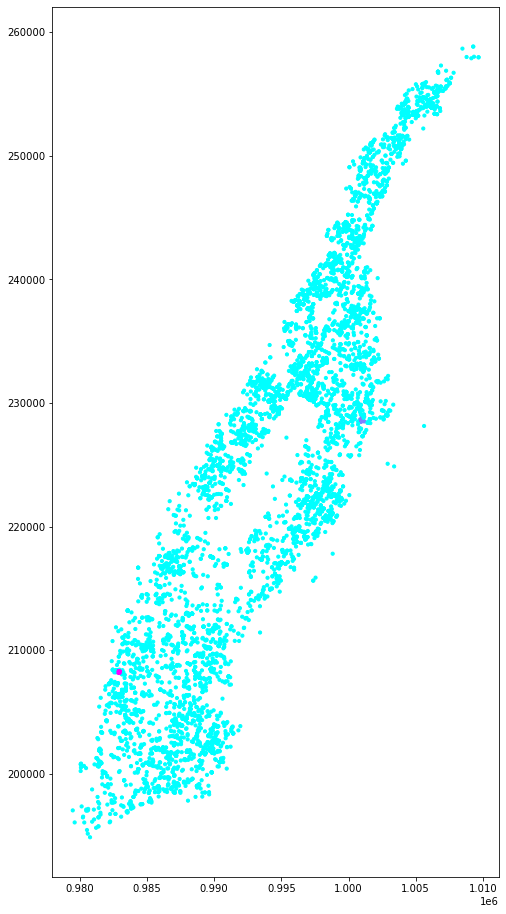

eps = 137.86012138045032 , min_samples = 120 , num_detected_points = 171


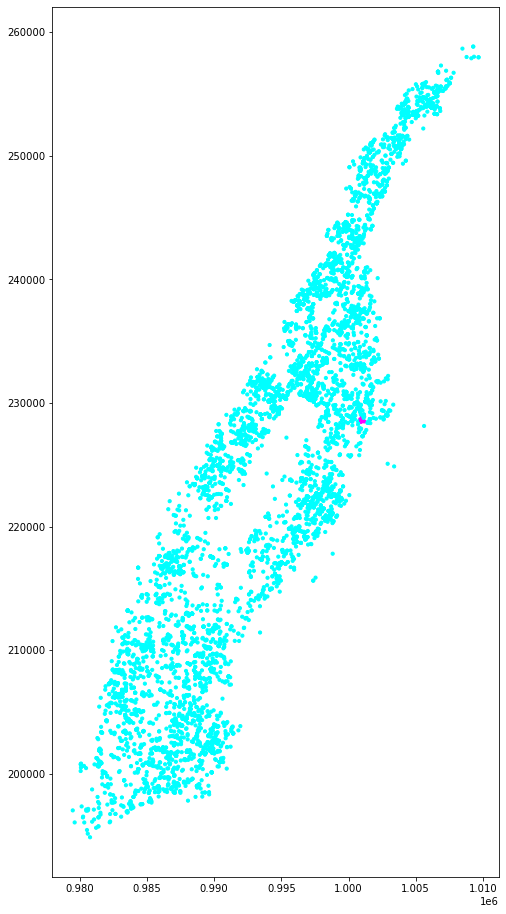

eps = 137.86012138045032 , min_samples = 160 , num_detected_points = 171


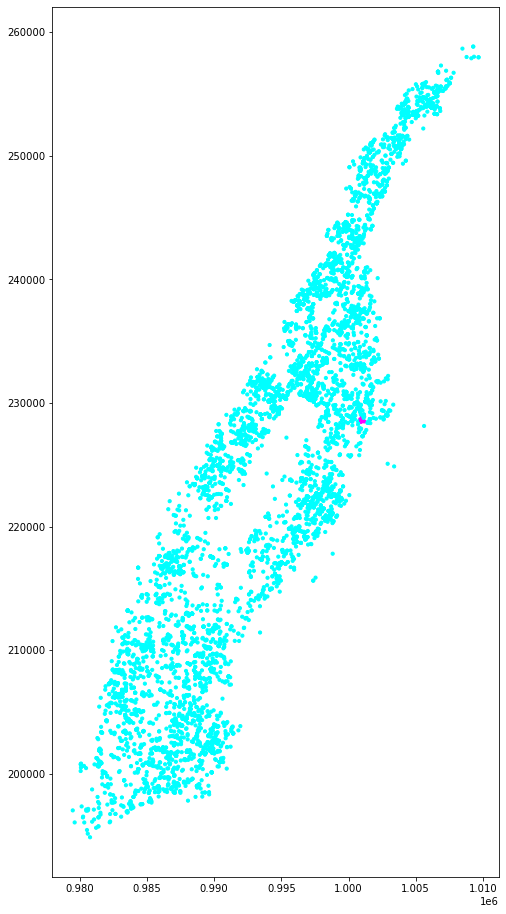

eps = 297.01062787404817 , min_samples = 80 , num_detected_points = 619


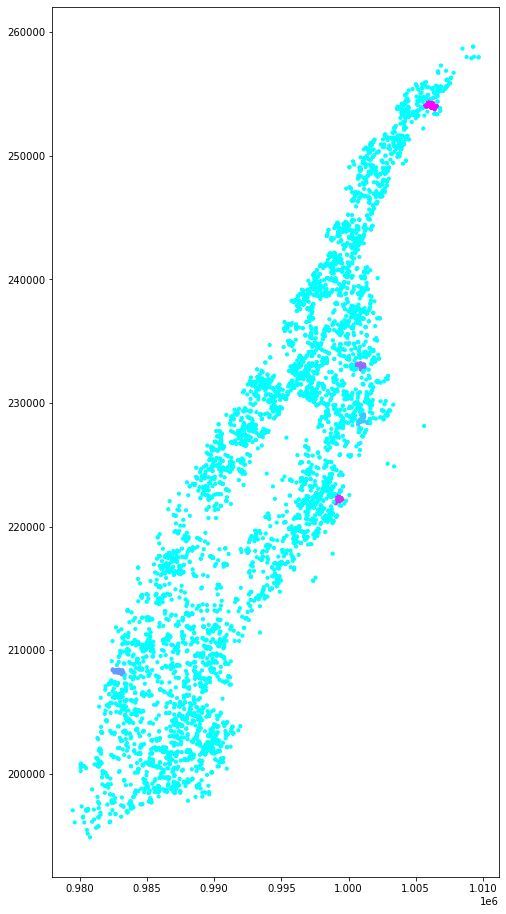

eps = 297.01062787404817 , min_samples = 120 , num_detected_points = 328


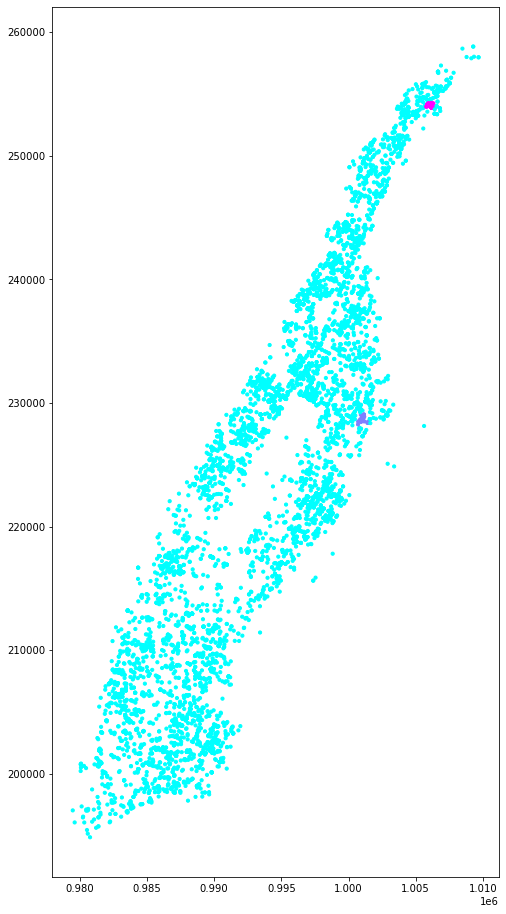

eps = 297.01062787404817 , min_samples = 160 , num_detected_points = 185


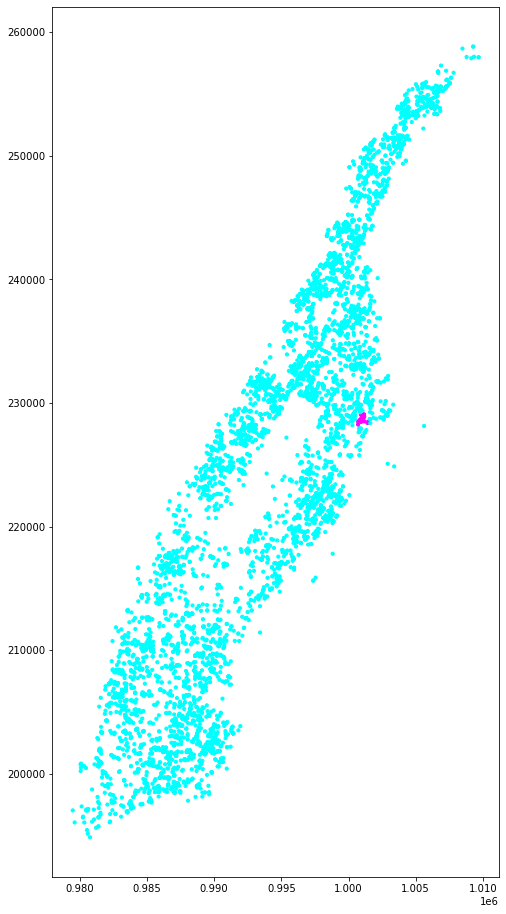

eps = 639.8900000000003 , min_samples = 160 , num_detected_points = 446


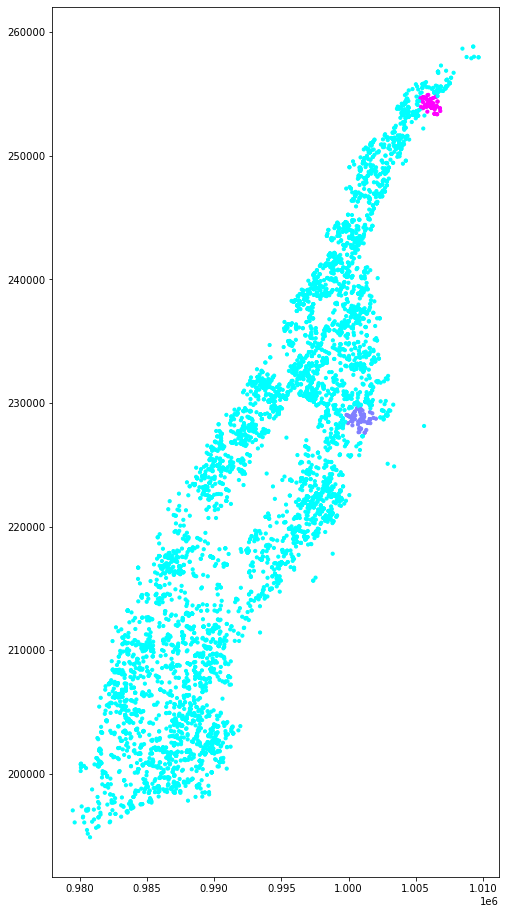

eps = 639.8900000000003 , min_samples = 200 , num_detected_points = 246


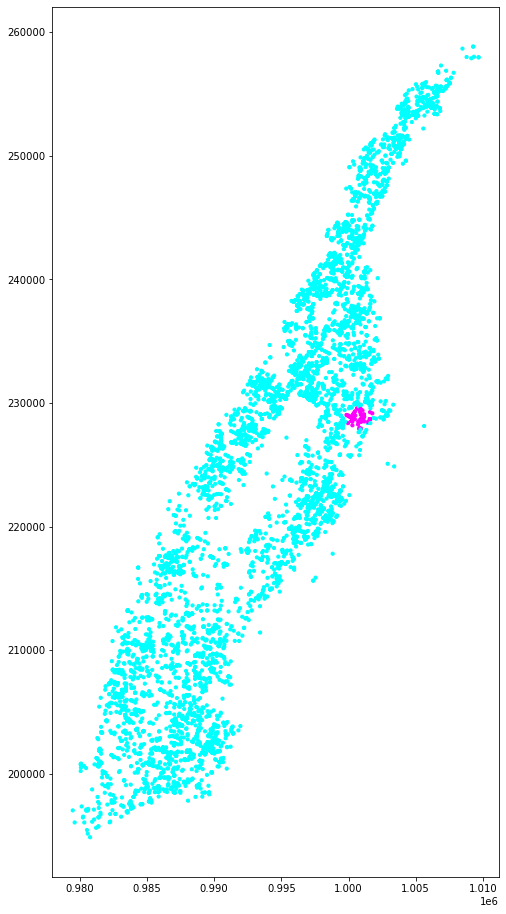

In [3]:
# Rodent complaint data from 2016
import numpy as np
import pandas as pd
rat = pd.read_csv("Manhattan 311 Rodent Complaints.csv")
print(rat.head())
ratdata = rat.values

total_num_samples = len(ratdata[:,0])
max_eps = max(np.max(ratdata[:,0])-np.min(ratdata[:,0]),np.max(ratdata[:,1])-np.min(ratdata[:,1]))

for eps in np.logspace(np.log10(max_eps)-3,np.log10(max_eps),10):
    for min_samples in range(40,800,40):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(ratdata)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
            print("eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0]))
            plt.figure(figsize=(8,16))
            plt.scatter(ratdata[:,0],ratdata[:,1],c=db.labels_,s=10,cmap=plt.cm.cool)
            plt.show()
